In [2]:
# imports
import cv2
import keyboard as kys
from IPython.display import clear_output
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# filters
sharpen1_kernel = np.array([[0, -1, 0],
                            [-1, 5, -1],
                            [0, -1, 0]])

sharpen2_kernel = np.array([[-1, -1, -1],
                            [-1, 9, -1],
                            [-1, -1, -1]])

edge1_kernel = np.array([[0, -1, 0],
                        [-1, 4, -1],
                        [0, -1, 0]])

edge2_kernel = np.array([[-1, -1, -1],
                        [-1, 8, -1],
                        [-1, -1, -1]])

In [1]:
# load mnist dataset
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


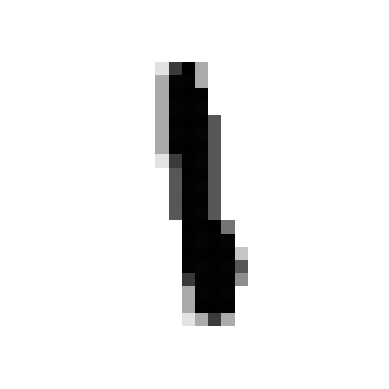

In [11]:
# process mnist data
for i in range(0,201):
    plt.imshow(255 - X_train[i,:,:], cmap='gray')
    plt.axis('off')
    plt.show()
    clear_output(wait=True)

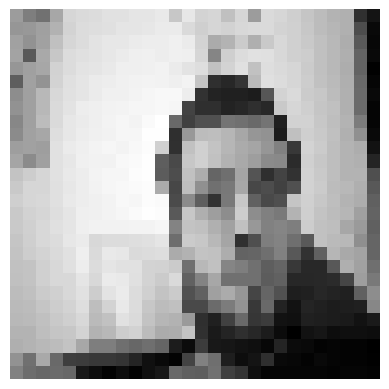

In [14]:
# preparations
cam = cv2.VideoCapture(0)
sharpen1_check = False
sharpen2_check = False
edge1_check = False
edge2_check = False
threshold = 30
scale = False

if cam.isOpened():
    # img stream
    while True:
        # user inputs
        if kys.is_pressed('esc'):
            cam.release()
            break
            
        if kys.is_pressed('1'):
            sharpen1_check = not sharpen1_check
            
        if kys.is_pressed('2'):
            sharpen2_check = not sharpen2_check
            
        if kys.is_pressed('3'):
            edge1_check = not edge1_check    
        
        if kys.is_pressed('4'):
            edge2_check = not edge2_check
            
        if kys.is_pressed('s'):
            scale = not scale
            
        # capture frame
        result, frame = cam.read()
            
        # apply filters
        if result:
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            
            if sharpen1_check:
                frame = cv2.filter2D(frame, -1, sharpen1_kernel)
                
            if sharpen2_check:
                frame = cv2.filter2D(frame, -1, sharpen2_kernel)
                
            if edge1_check:
                frame = cv2.filter2D(frame, -1, edge1_kernel)
                frame[frame < threshold] = 0
                frame[frame >= threshold] = 255
                frame = 255 - frame
                
            if edge2_check:
                frame = cv2.filter2D(frame, -1, edge2_kernel)
                frame[frame < threshold] = 0
                frame[frame >= threshold] = 255
                frame = 255 - frame
                
            if scale:
                frame = cv2.resize(frame, (28,28))

            # display frame
            plt.imshow(frame, cmap='gray')
            plt.axis('off')
            plt.show()
            clear_output(wait=True)